In [1]:
import pandas as pd
# file name 합치기
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import io, feature
from skimage.transform import resize
import cv2
from PIL import ImageChops
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [73]:
import warnings ;warnings.filterwarnings('ignore')
import sys ;sys.path.append("../../../");sys.path.append("../../")

from  CommonFunc import *

DataPreprocessing.plotSetting()

  - ◎ matplot graph set complete


## 제가노인 데이터 출처
https://data.seoul.go.kr/dataList/10182/S/2/datasetView.do

In [3]:
복지시설 = pd.read_csv("./데이터파일/서울시 노인복지시설.csv")

## 컬럼 설명
### 시설코드	시설유형명	시설종류상세명	자치구구분	시설장명	시군구코드	시군구명	시설주소	위도	경도	경찰서명	경찰서부서명	경찰서부서코드	시도경찰청명

In [4]:
복지시설.head()

,A3710,(노인) 노인요양시설,노인의료복지시설,자치구,황용규,1174000000,강동구,서울특별시 강동구 구천면로68길 46 (천호동),37.5477564,127.1425402,서울강동경찰서,서울강동,G30000001329742,서울청
0,A8007,(노인) 노인요양시설,노인의료복지시설,자치구,조규영,1174000000,강동구,서울특별시 강동구 양재대로 1465마루홈타운 301호 (길동),37.536808,127.139292,서울강동경찰서,서울강동,G30000001329742,서울청
1,A9535,(노인) 노인요양시설,노인의료복지시설,자치구,이유리,1174000000,강동구,서울특별시 강동구 동남로71길 32-5강동노인종합복지관 5층 (명일동),37.552250,127.154407,서울강동경찰서,서울강동,G30000001329742,서울청
2,G1662,(노인) 노인요양시설,노인의료복지시설,자치구,한정일,1174000000,강동구,서울특별시 강동구 고덕로 476 (강일동),37.550417,127.159592,서울강동경찰서,서울강동,G30000001329742,서울청
3,G2659,(노인) 노인요양시설,노인의료복지시설,자치구,박형대,1174000000,강동구,서울특별시 강동구 명일로 230 2층 (길동),37.539130,127.146800,서울강동경찰서,서울강동,G30000001329742,서울청
4,G4483,(노인) 노인요양시설,노인의료복지시설,자치구,정혜수,1174000000,강동구,서울특별시 강동구 천호대로 1240-9 (둔촌동),37.532176,127.148125,서울강동경찰서,서울강동,G30000001329742,서울청


In [6]:
재가노인 = pd.read_csv("./데이터파일/5.재가노인+복지시설_20240902154657.csv")

In [7]:
재가노인.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  28 non-null     object
 1   자치구별(2)  28 non-null     object
 2   2022     28 non-null     object
 3   2022.1   28 non-null     object
 4   2022.2   28 non-null     object
 5   2022.3   28 non-null     object
 6   2022.4   28 non-null     object
 7   2022.5   28 non-null     object
 8   2022.6   28 non-null     object
 9   2022.7   28 non-null     object
 10  2022.8   28 non-null     object
 11  2022.9   28 non-null     object
 12  2022.10  28 non-null     object
 13  2022.11  28 non-null     object
 14  2022.12  28 non-null     object
 15  2022.13  28 non-null     object
 16  2022.14  28 non-null     object
 17  2022.15  28 non-null     object
 18  2022.16  28 non-null     object
 19  2022.17  28 non-null     object
 20  2022.18  28 non-null     object
 21  2022.19  28 non-null     object
 22  2022

In [8]:
재가노인.describe

<bound method NDFrame.describe of     자치구별(1)  자치구별(2)      2022       2022.1       2022.2    2022.3    2022.4  \
0   자치구별(1)  자치구별(2)        합계           합계           합계        합계   방문요양서비스   
1   자치구별(1)  자치구별(2)  시설수 (개소)  이용인원-정원 (명)  이용인원-현원 (명)  종사자수 (명)  시설수 (개소)   
2        합계       소계      1878        14629        39483     33582       767   
3        합계      종로구        20          102          428       260         7   
4        합계       중구        26          203          679       360        10   
5        합계      용산구        21          139          395       181         8   
6        합계      성동구        43          360          625       476        17   
7        합계      광진구        45          508          856       484        17   
8        합계     동대문구        82          892         1417       742        29   
9        합계      중랑구       155          960         2643      2132        61   
10       합계      성북구        78          747         1295       911        30   
11    

In [9]:
재가노인.head()

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,...,2022.22,2022.23,2022.24,2022.25,2022.26,2022.27,2022.28,2022.29,2022.30,2022.31
0,자치구별(1),자치구별(2),합계,합계,합계,합계,방문요양서비스,방문요양서비스,방문요양서비스,방문요양서비스,...,방문간호서비스,방문간호서비스,복지용구지원서비스,복지용구지원서비스,복지용구지원서비스,복지용구지원서비스,재가노인지원서비스,재가노인지원서비스,재가노인지원서비스,재가노인지원서비스
1,자치구별(1),자치구별(2),시설수 (개소),이용인원-정원 (명),이용인원-현원 (명),종사자수 (명),시설수 (개소),이용인원-정원 (명),이용인원-현원 (명),종사자수 (명),...,이용인원-현원 (명),종사자수 (명),시설수 (개소),이용인원-정원 (명),이용인원-현원 (명),종사자수 (명),시설수 (개소),이용인원-정원 (명),이용인원-현원 (명),종사자수 (명)
2,합계,소계,1878,14629,39483,33582,767,-,19912,21086,...,315,97,42,-,2626,62,18,-,2342,97
3,합계,종로구,20,102,428,260,7,-,167,179,...,-,-,1,-,31,1,1,-,131,5
4,합계,중구,26,203,679,360,10,-,338,259,...,-,-,-,-,-,-,1,-,164,4


In [10]:
재가노인.tail()

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,...,2022.22,2022.23,2022.24,2022.25,2022.26,2022.27,2022.28,2022.29,2022.30,2022.31
23,합계,관악구,82,775,1546,1110,31,-,668,714,...,-,-,3,-,-,-,1,-,140,4
24,합계,서초구,54,268,6337,10449,22,-,5766,6337,...,24,6,-,-,-,-,-,-,-,-
25,합계,강남구,59,477,2829,1197,21,-,824,838,...,-,-,4,-,1483,6,-,-,-,-
26,합계,송파구,117,903,2154,1530,48,-,977,1033,...,6,9,4,-,151,6,1,-,123,4
27,합계,강동구,82,744,1513,1151,34,-,654,785,...,-,-,1,-,-,-,2,-,133,5


In [15]:
재가노인 = pd.read_csv("./데이터파일/11.강범식_수정_재가노인+복지시설.csv")

In [18]:
재가노인['자치구별(1)'].unique()

array(['합계'], dtype=object)

## 컬럼 삭제,정제

In [21]:
재가노인 = 재가노인.drop(columns= ['자치구별(1)','시점'])

In [25]:
재가노인 = 재가노인.rename(columns={"자치구별(2)" : "자치구"})

In [31]:
자치구리스트 = 재가노인['자치구'].unique()[재가노인['자치구'].unique() != '소계']

In [89]:
재가노인[재가노인['자치구'] == '강동구']

,자치구,항목,합계,방문요양서비스,주ㆍ야간 보호 서비스,단기보호서비스,방문목욕서비스,방문간호서비스,복지용구지원서비스,재가노인지원서비스
100,강동구,시설수 (개소),82,34,19,-,26,-,1,2
101,강동구,이용인원-정원 (명),744,-,744,-,-,-,-,-
102,강동구,이용인원-현원 (명),1513,654,615,-,111,-,-,133
103,강동구,종사자수 (명),1151,785,247,-,114,-,-,5


In [83]:
a =[]
b =[]
c =[]
d =[]
for i in range(len(자치구리스트)):

    v = 재가노인[재가노인['자치구'] == 자치구리스트[i]]
    합계 = np.array(v['합계'])
    항목 = np.array(v['항목'])

    #a,b,c,d = 항목


    a.append(합계[0])
    b.append(합계[1])
    c.append(합계[2])
    d.append(합계[3])

    v = a,b,c,d


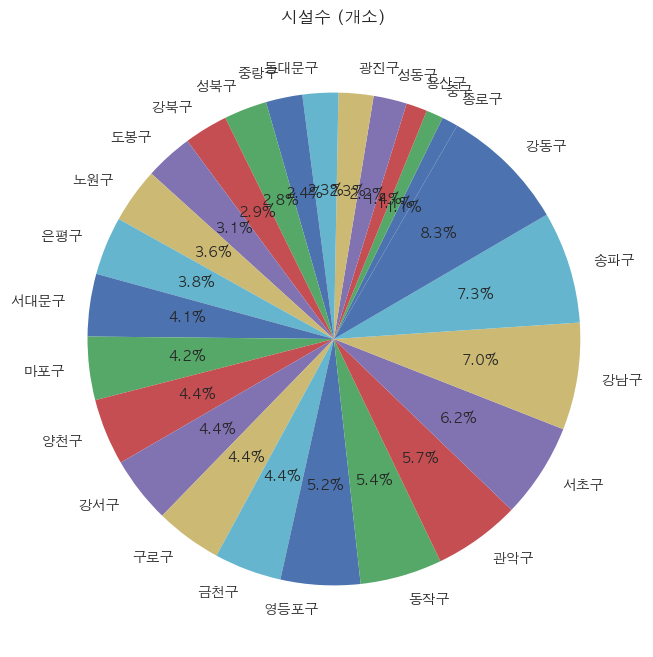

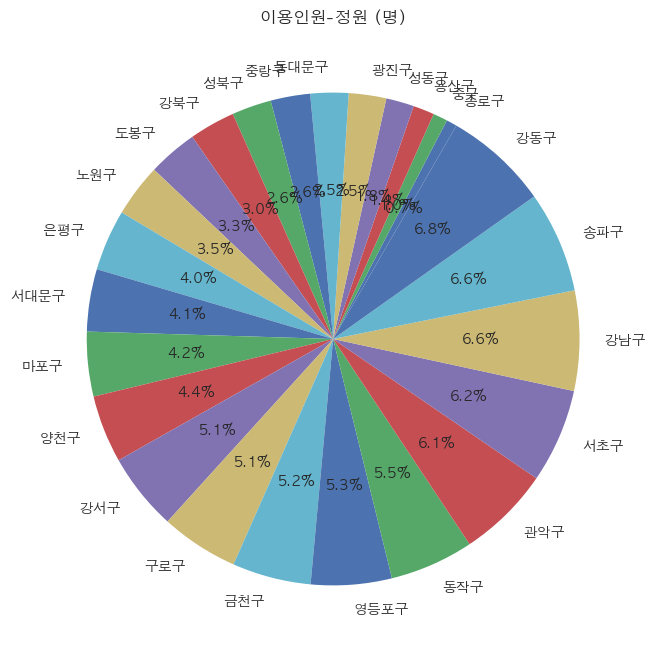

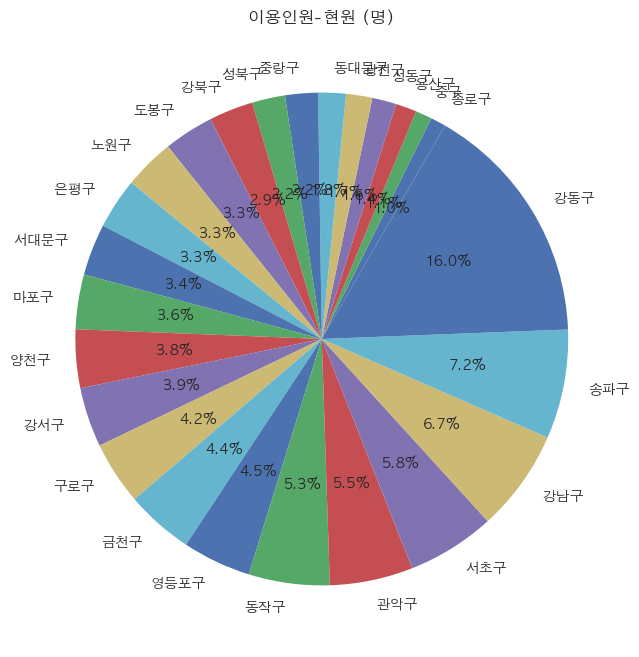

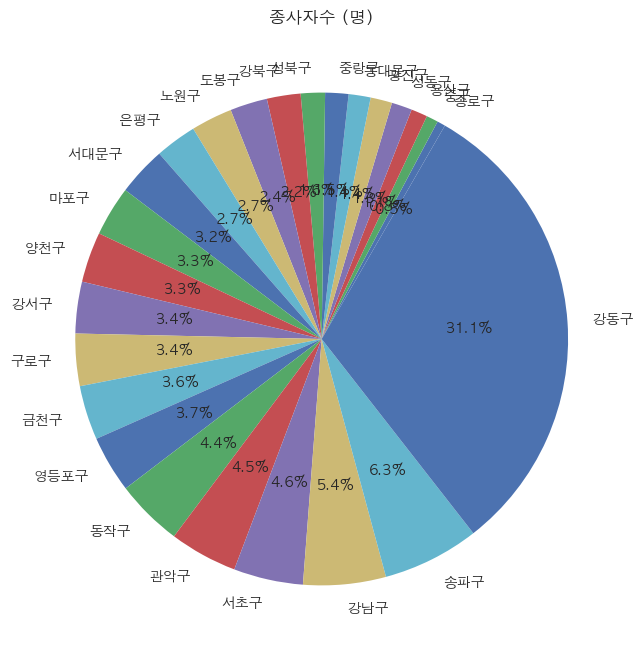

In [85]:
labels = 자치구리스트

for i in range(len(v)):
    sizes = sorted(v[i])

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)


    plt.title(f'{항목[i]}')
    plt.show()


In [114]:
#재가노인[재가노인['자치구'] == '강동구'].iloc[2,3:].values

values = np.where(재가노인[재가노인['자치구'] == '강동구'].iloc[2,3:].values == '-', 0, 재가노인[재가노인['자치구'] == '강동구'].iloc[2,3:].values)

# `values`의 타입을 int로 변경 (이전에는 str이었음)
values = values.astype(int)

In [117]:
재가노인[재가노인['자치구'] == '강동구'].iloc[2,3:].index

Index(['방문요양서비스', '주ㆍ야간 보호 서비스', '단기보호서비스', '방문목욕서비스', '방문간호서비스', '복지용구지원서비스',
       '재가노인지원서비스'],
      dtype='object')

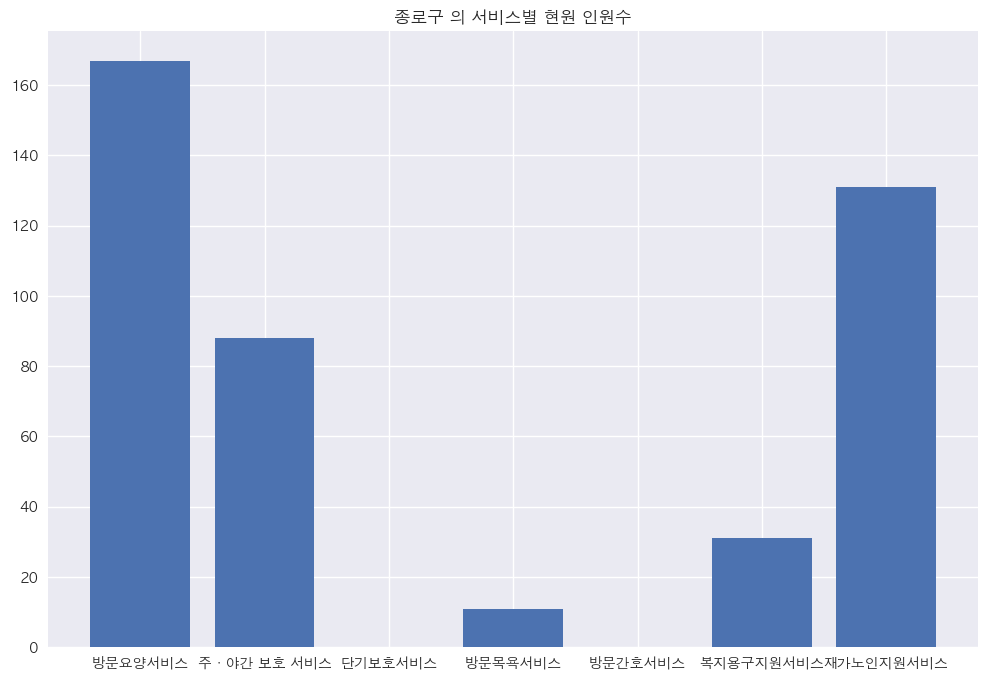

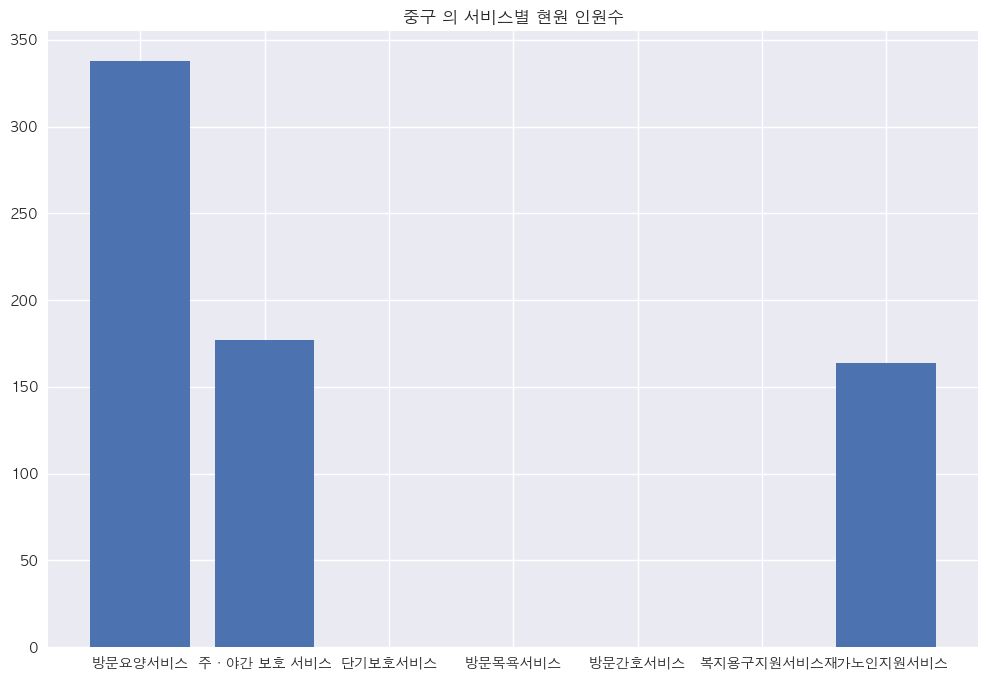

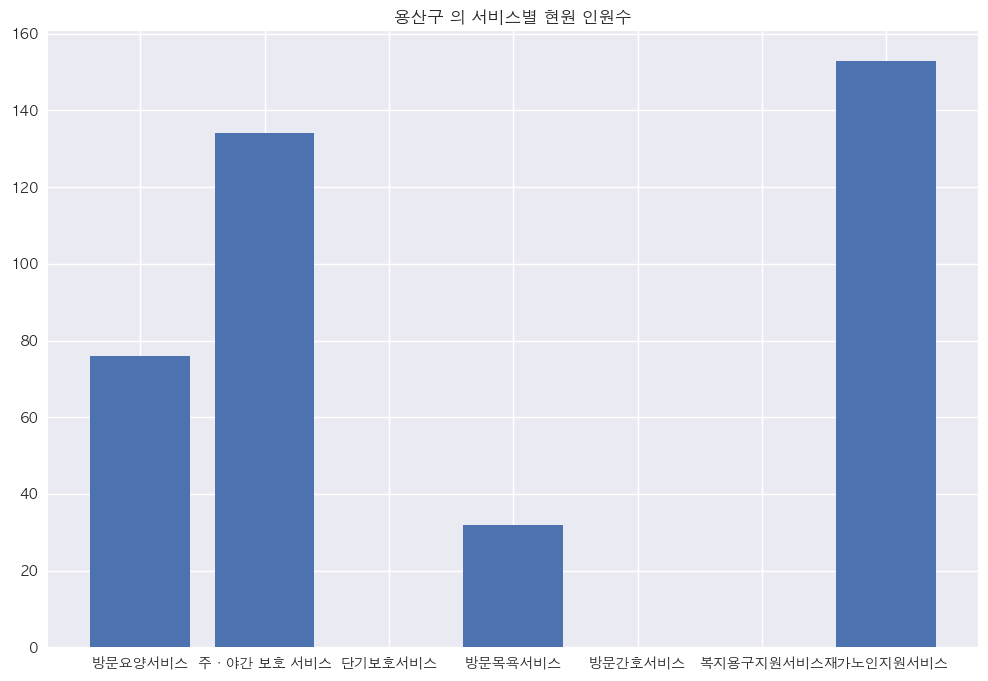

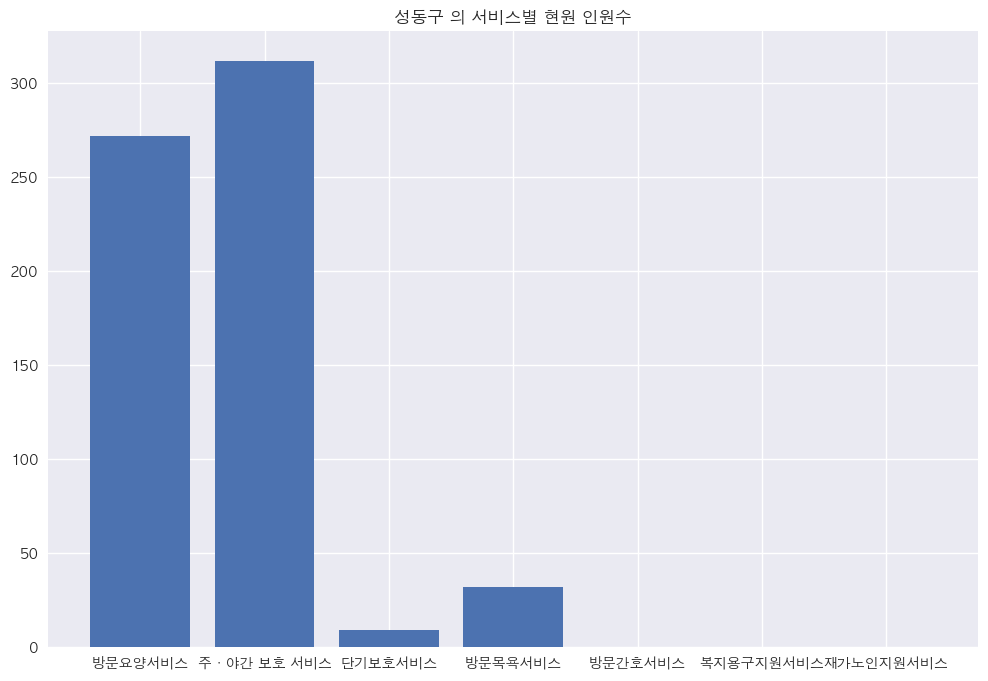

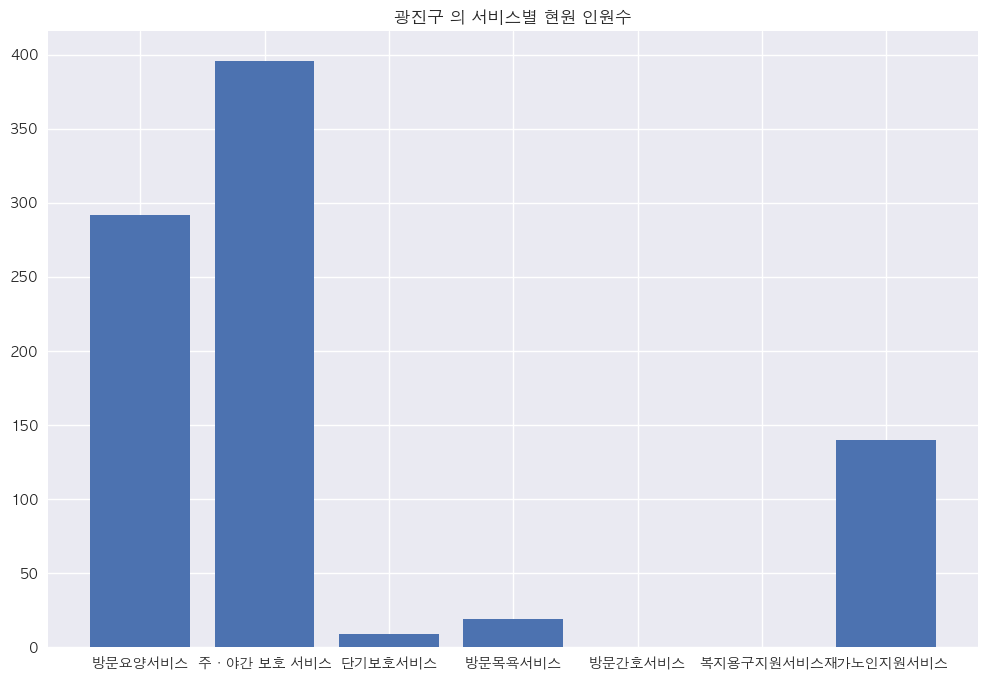

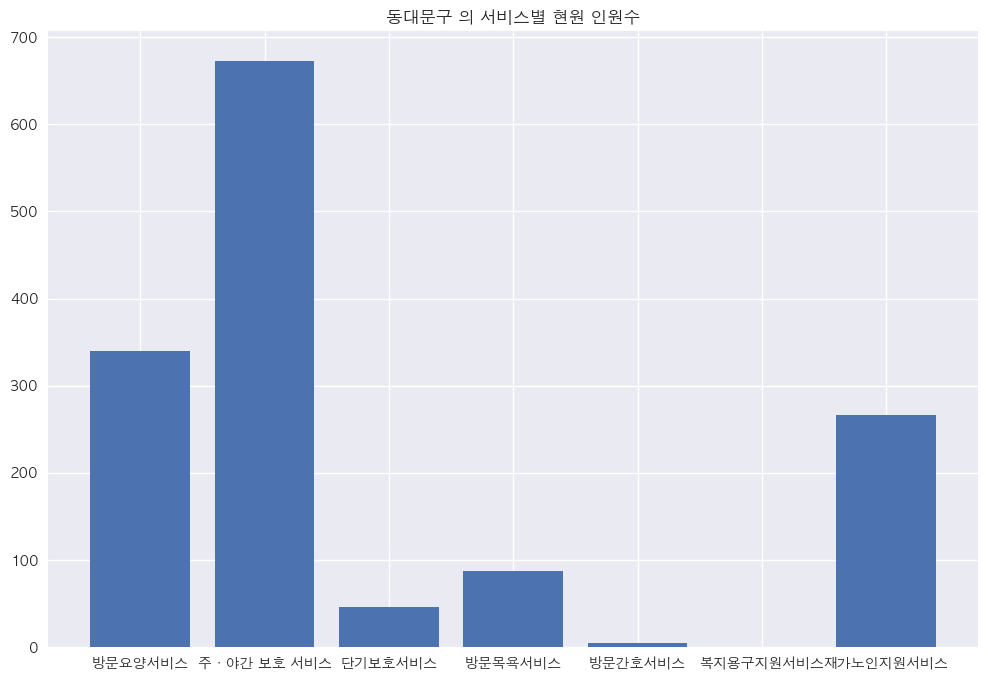

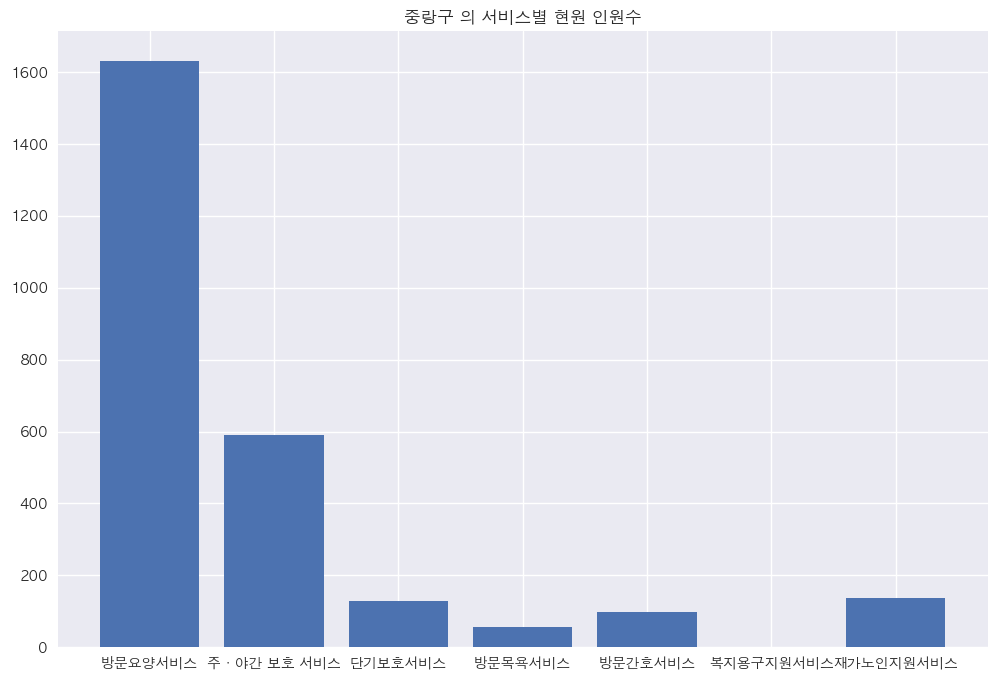

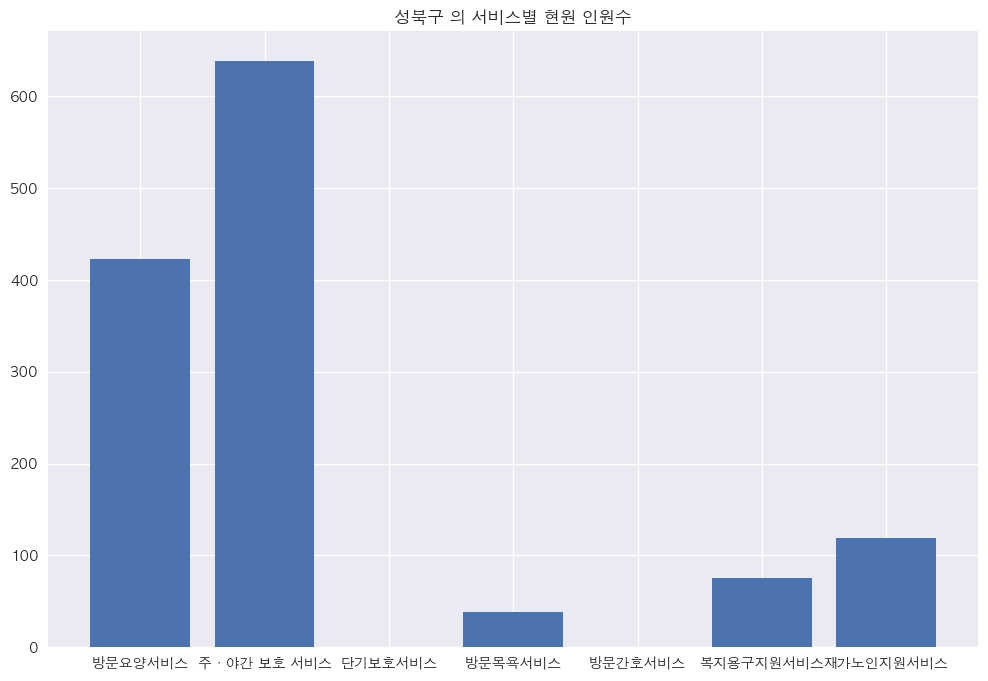

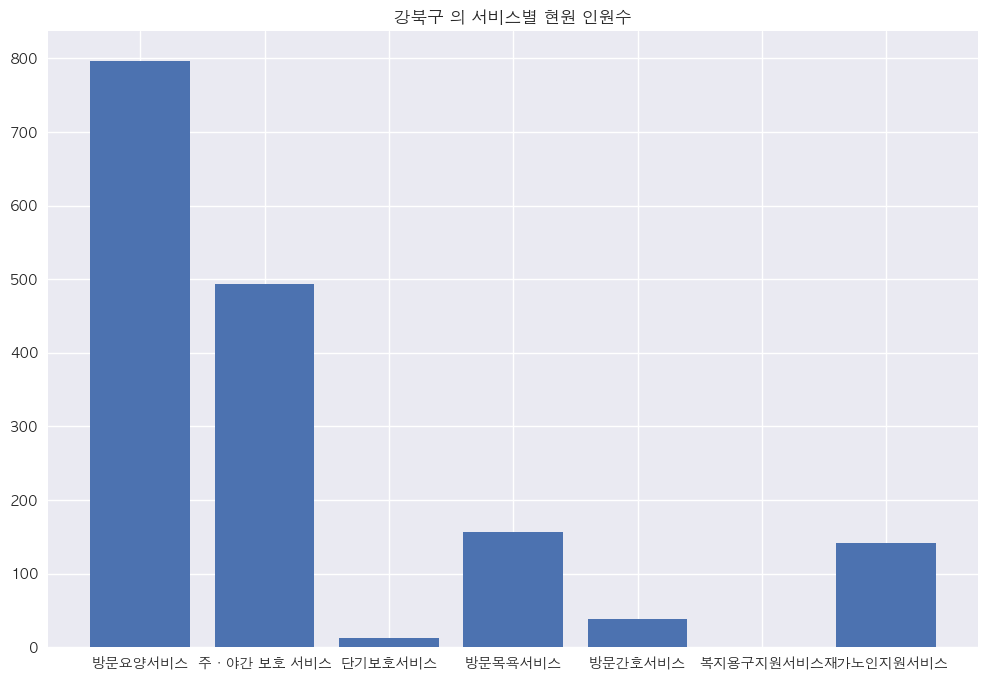

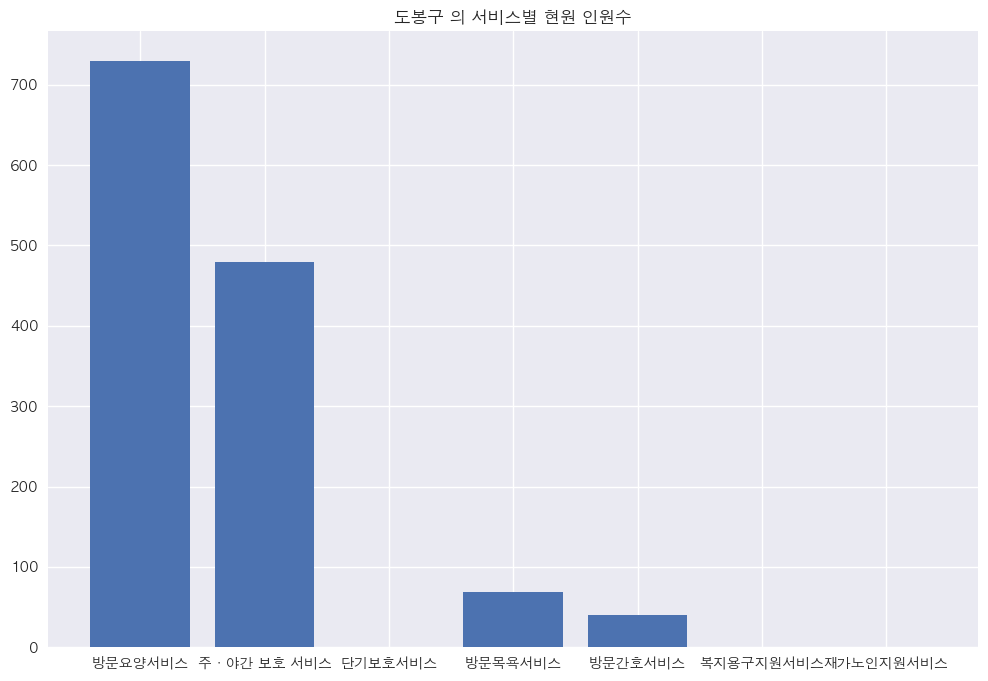

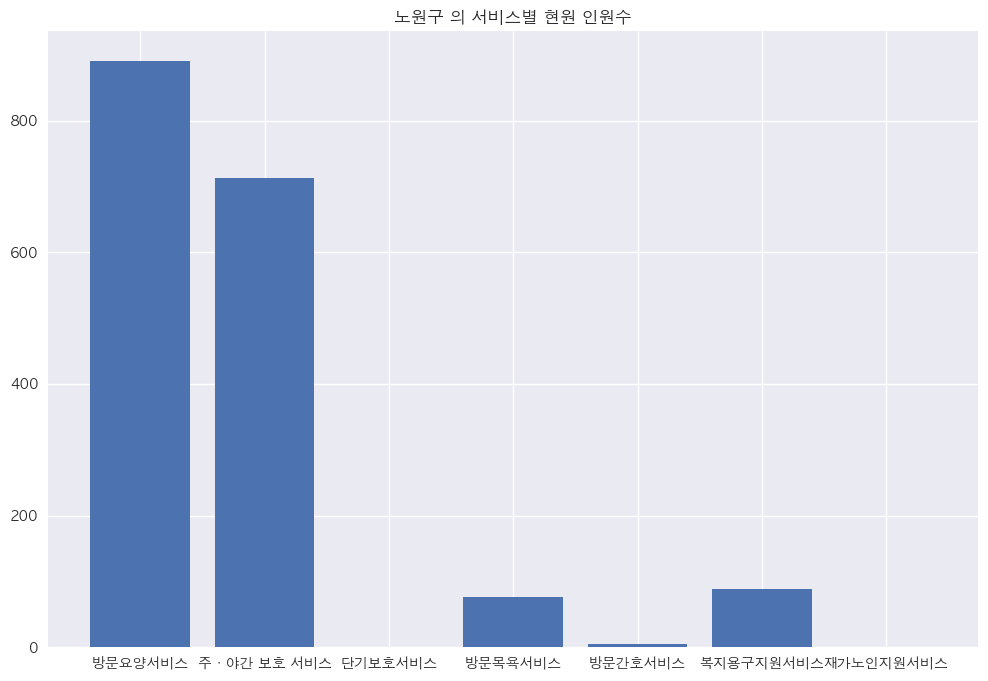

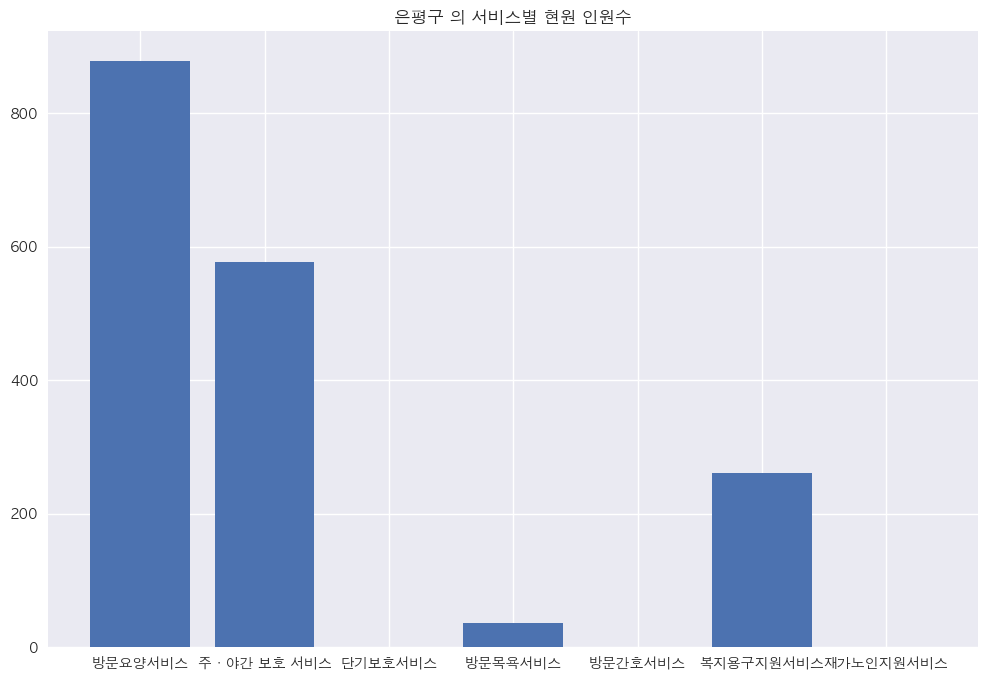

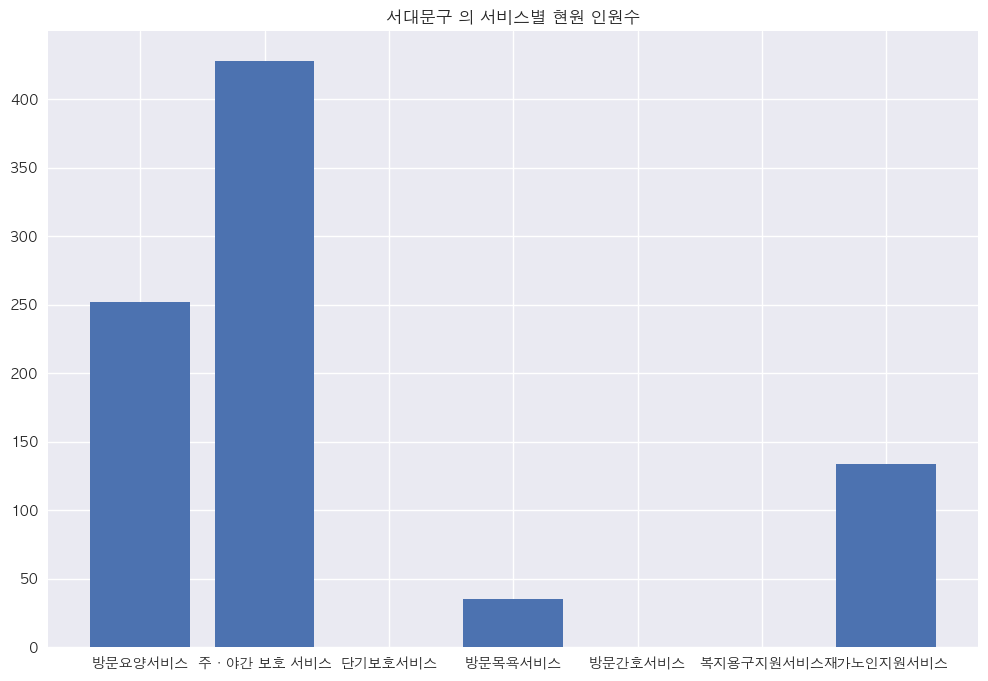

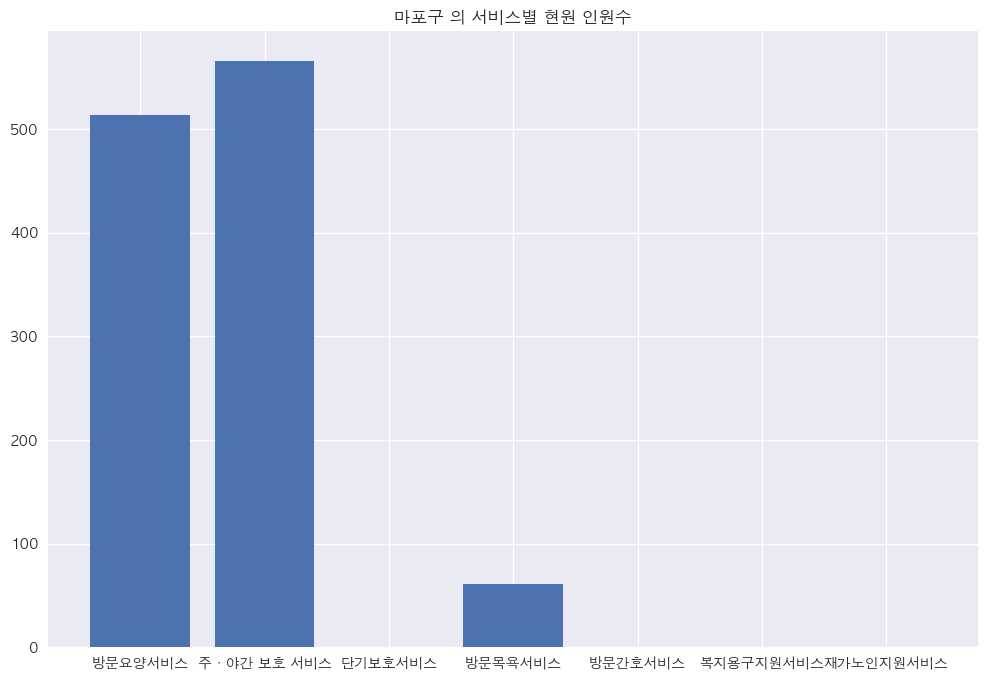

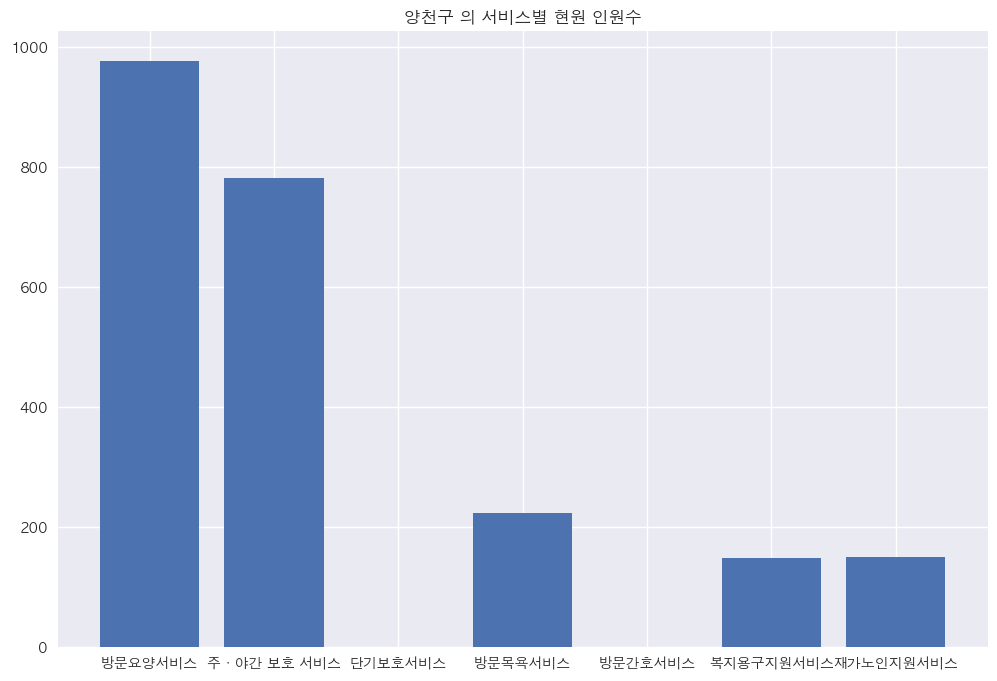

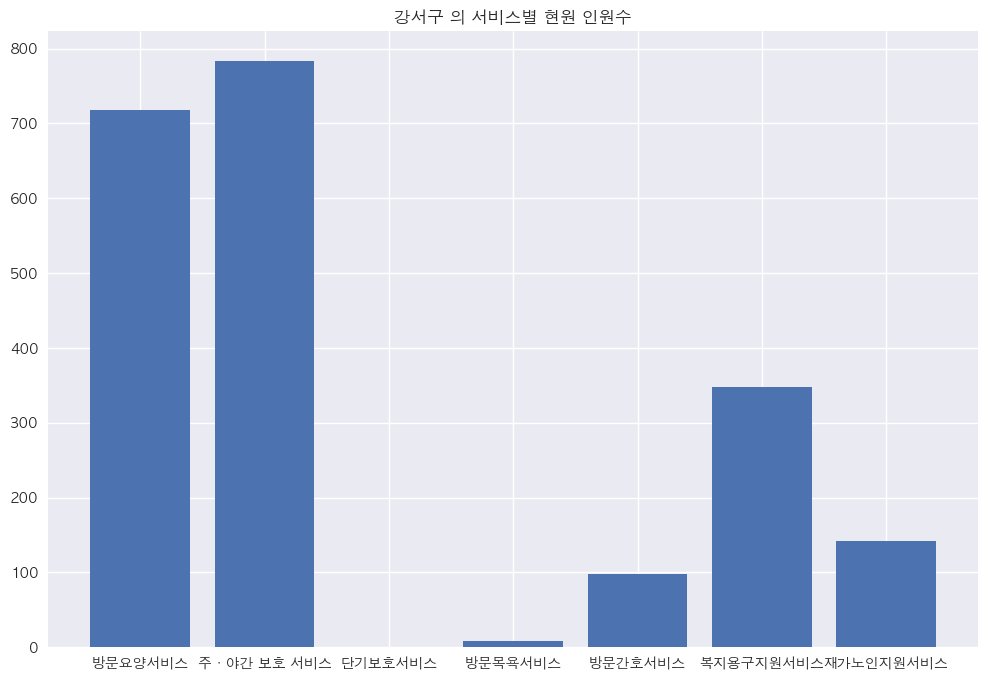

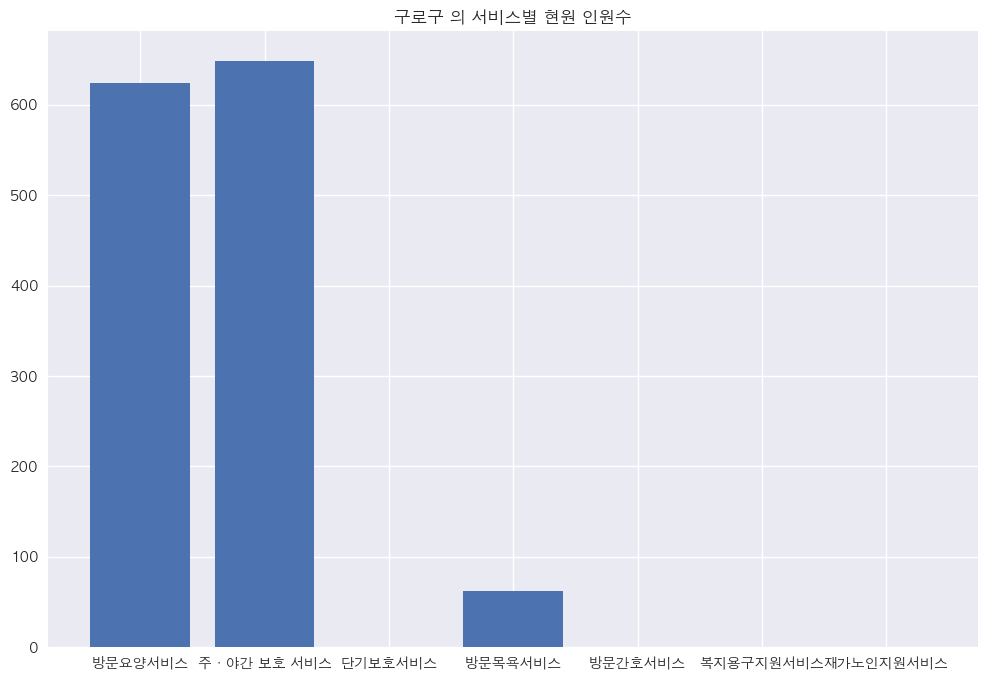

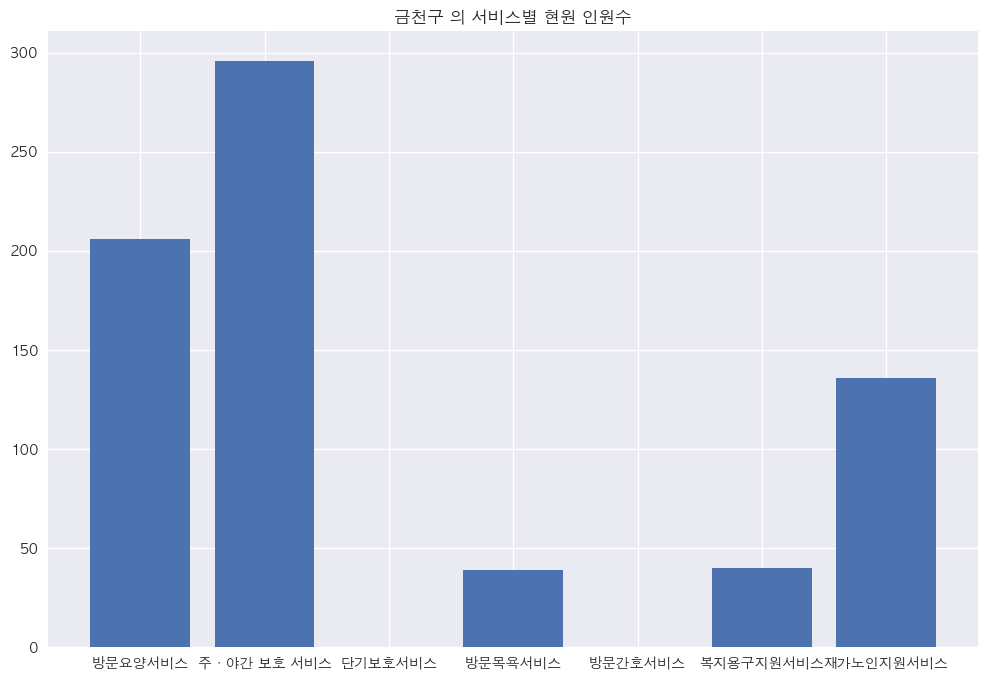

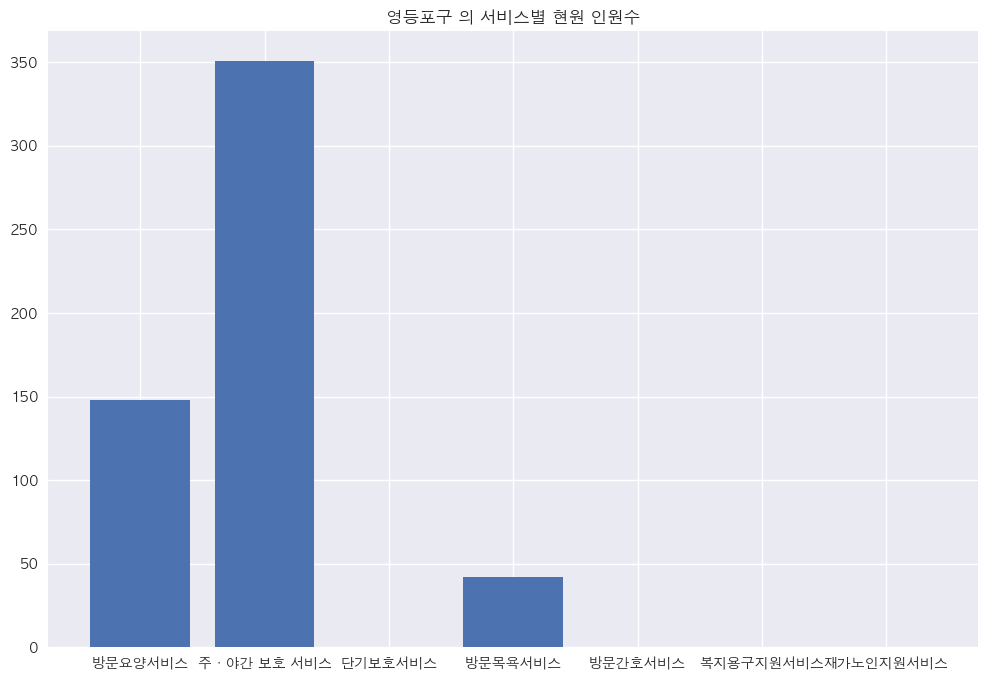

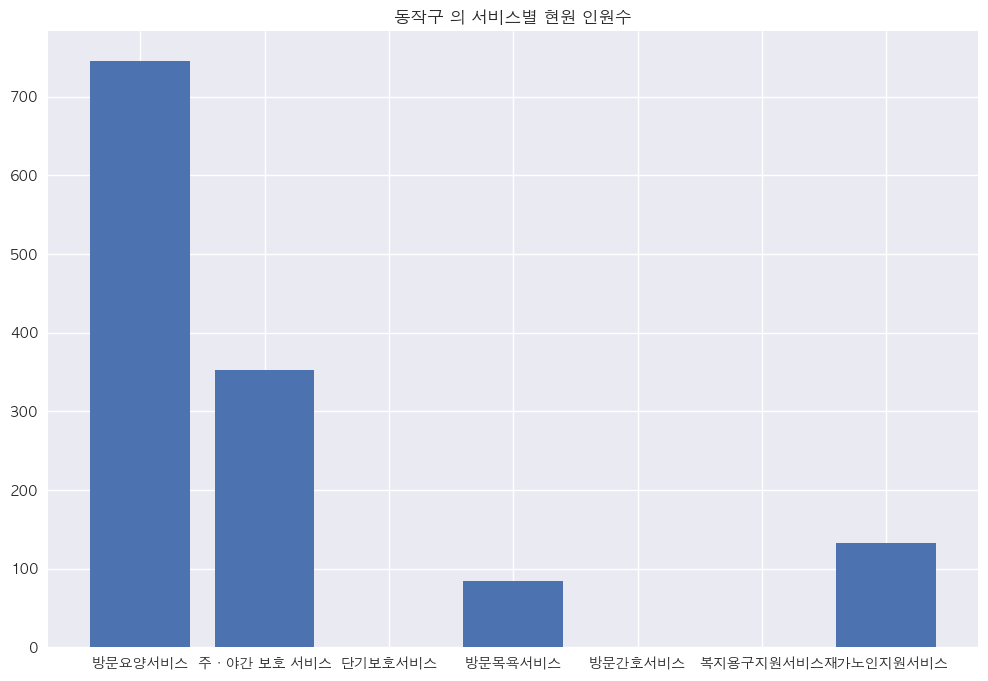

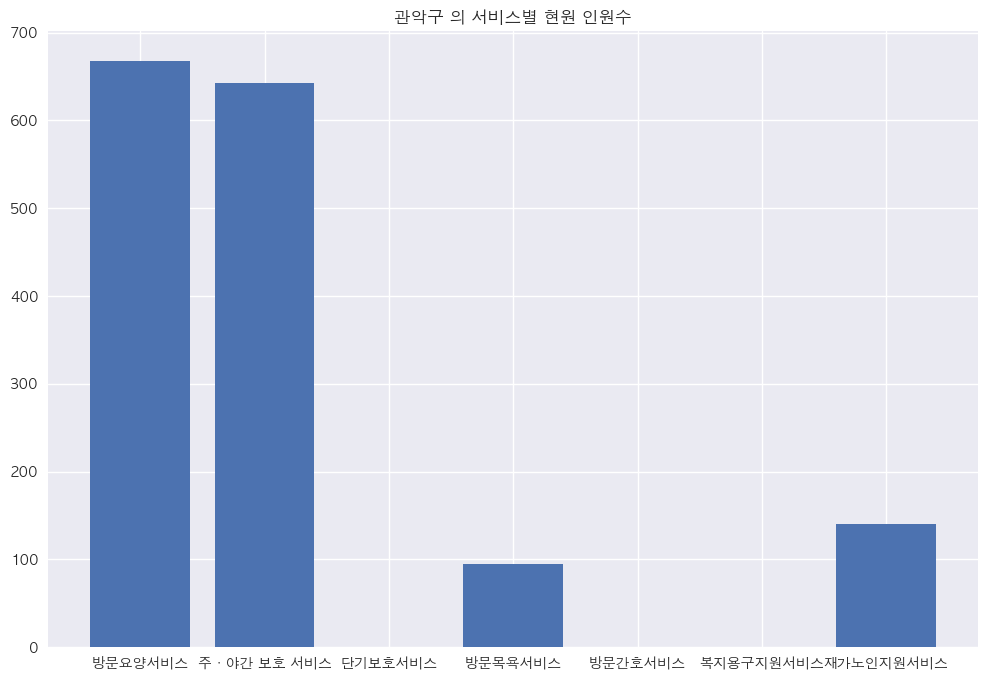

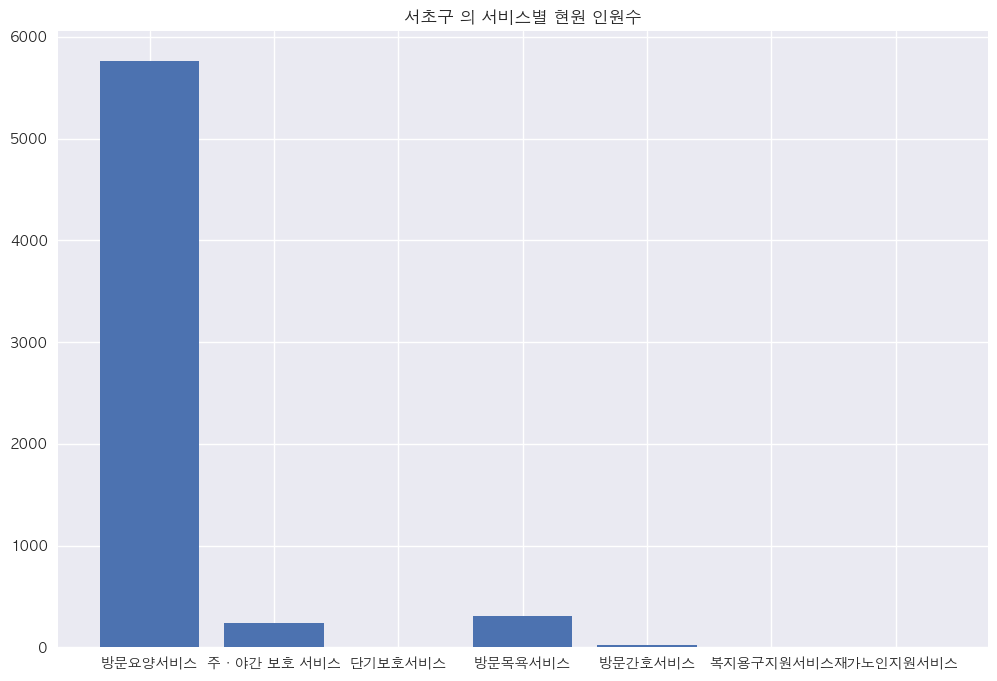

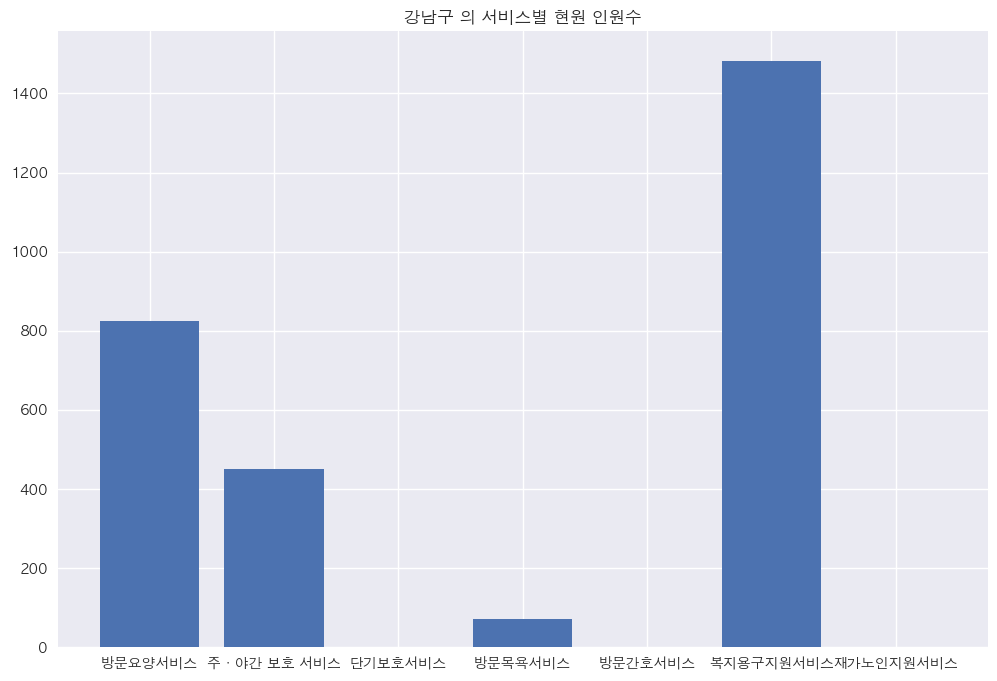

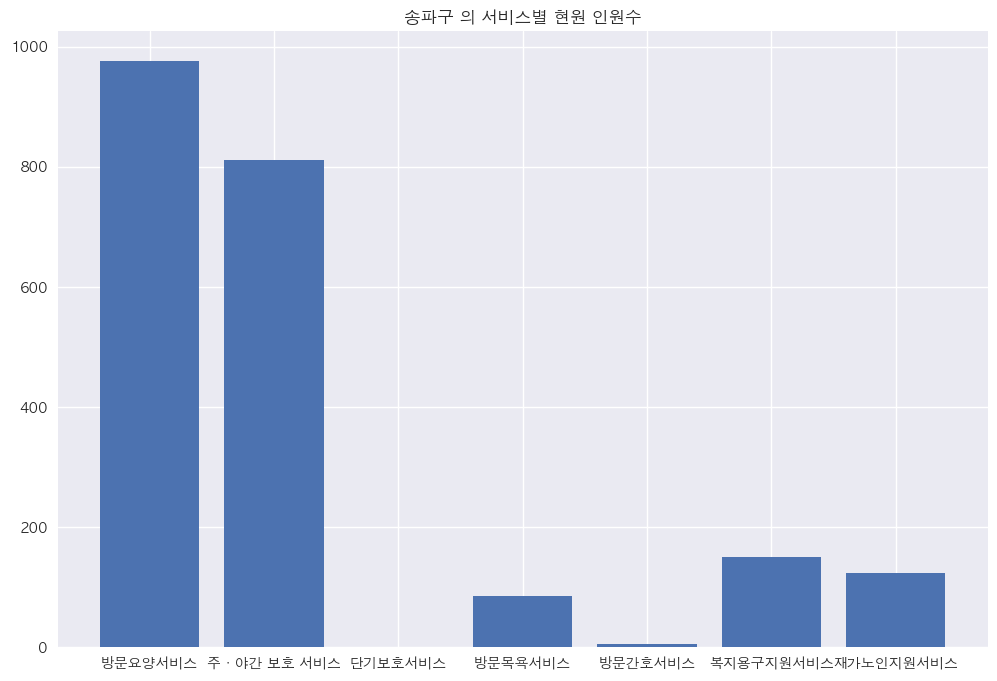

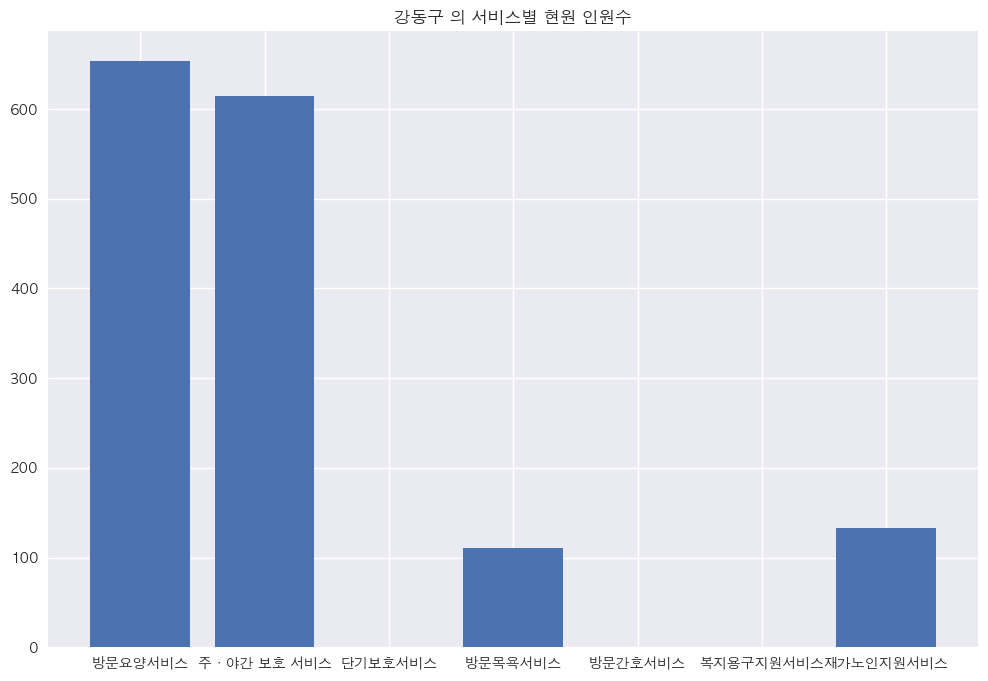

In [123]:
for i in 자치구리스트:
    fig, ax = plt.subplots(figsize=(12, 8))

    values = np.where(재가노인[재가노인['자치구'] == i].iloc[2,3:].values == '-', 0, 재가노인[재가노인['자치구'] == i].iloc[2,3:].values)

    # `values`의 타입을 int로 변경 (이전에는 str이었음)
    values = values.astype(int)
    ax.bar(재가노인[재가노인['자치구'] == i].iloc[2,3:].index,values)
    plt.title(f"{i} 의 서비스별 현원 인원수")
    plt.show()

In [126]:
재가노인[재가노인['자치구'] == '소계']

,자치구,항목,합계,방문요양서비스,주ㆍ야간 보호 서비스,단기보호서비스,방문목욕서비스,방문간호서비스,복지용구지원서비스,재가노인지원서비스
0,소계,시설수 (개소),1878,767,457,23,547,24,42,18
1,소계,이용인원-정원 (명),14629,-,14380,249,-,-,-,-
2,소계,이용인원-현원 (명),39483,19912,12243,205,1840,315,2626,2342
3,소계,종사자수 (명),33582,21086,5517,113,6610,97,62,97
